In [2]:
import sys
sys.path.append('/Users/valentinkilian/Documents/Cours/Stage2021/StageValentin/code/Deffuant')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import Deffuant as de
import pickle as pk
import scipy.stats as stats

# Figure 0 (Degroot)

In [2]:
k=5   #Nombre d'individu
#Podération des opinions des autres
M1=np.array([[1/2,1/4,0,1/4,0],
            [3/4,0,1/4,0,0],
            [1/3,1/3,1/3,0,0],
            [5/10,2/10,1/10,2/10,0],
            [1/4, 0, 0, 1/4, 1/2]])

M2=np.array([[1/2,1/2,0,0,0],
            [3/4,1/4,0,0,0],
            [0,0,1/3,1/3,1/3],
            [0,0,1/10,2/10,7/10],
            [0,0, 1/2, 0, 1/2]])
alpha=0.1

M3=np.array([[alpha,0,0,1-alpha,0],
            [0,alpha,0,0,1-alpha],
            [1-alpha,0,alpha,0,0],
            [0,1-alpha,0,alpha,0],
            [0,0,1-alpha,0,alpha]])

Pour l'exemple on décide que les opinions a priori seront des distributions gaussiennes et un exponentiel, mais n'importe qu'elle distribution conviendrait, on génére ici la liste des distributions a priori

In [3]:
m=[1,-3,0,14] #liste des moyennes
v=[1,1,2,1] #liste des écarts types
F=[]
for i in range(4):
    F.append(stats.norm(loc=m[i],scale=v[i]).pdf)
F.append(stats.expon(loc=5,scale=0.5).pdf)

In [4]:
def Puissance_Matrice(M,n):
    N=M.copy()
    for i in range(n-1):
        N=N.dot(M)
    return N

'''Addition sur les distributions'''
def D_add(F,G):
    def foo(x):
        return F(x)+G(x)
    return foo

'''Multiplication externe sur les distributions'''
def D_mult(p,F):
    def foo(x):
        return p*F(x)
    return foo

'''#Fonction nulle '''
def Nul(x):
    return 0

'''Calcul de combinaison convexe de fonction de répartition'''
def Opinion_Pool_vect(P,F):
    Toreturn=Nul
    for i in range(len(P)):
        Toreturn=D_add(Toreturn,D_mult(P[i],F[i]))
    return Toreturn

'''Calcul du nouveau  vecteur d'opinion'''
def Opinion_Pool_matrix(M,F):
    Toreturn=[]
    for j in range(len(M)):
        Toreturn.append(Opinion_Pool_vect(M[j],F))
    return Toreturn

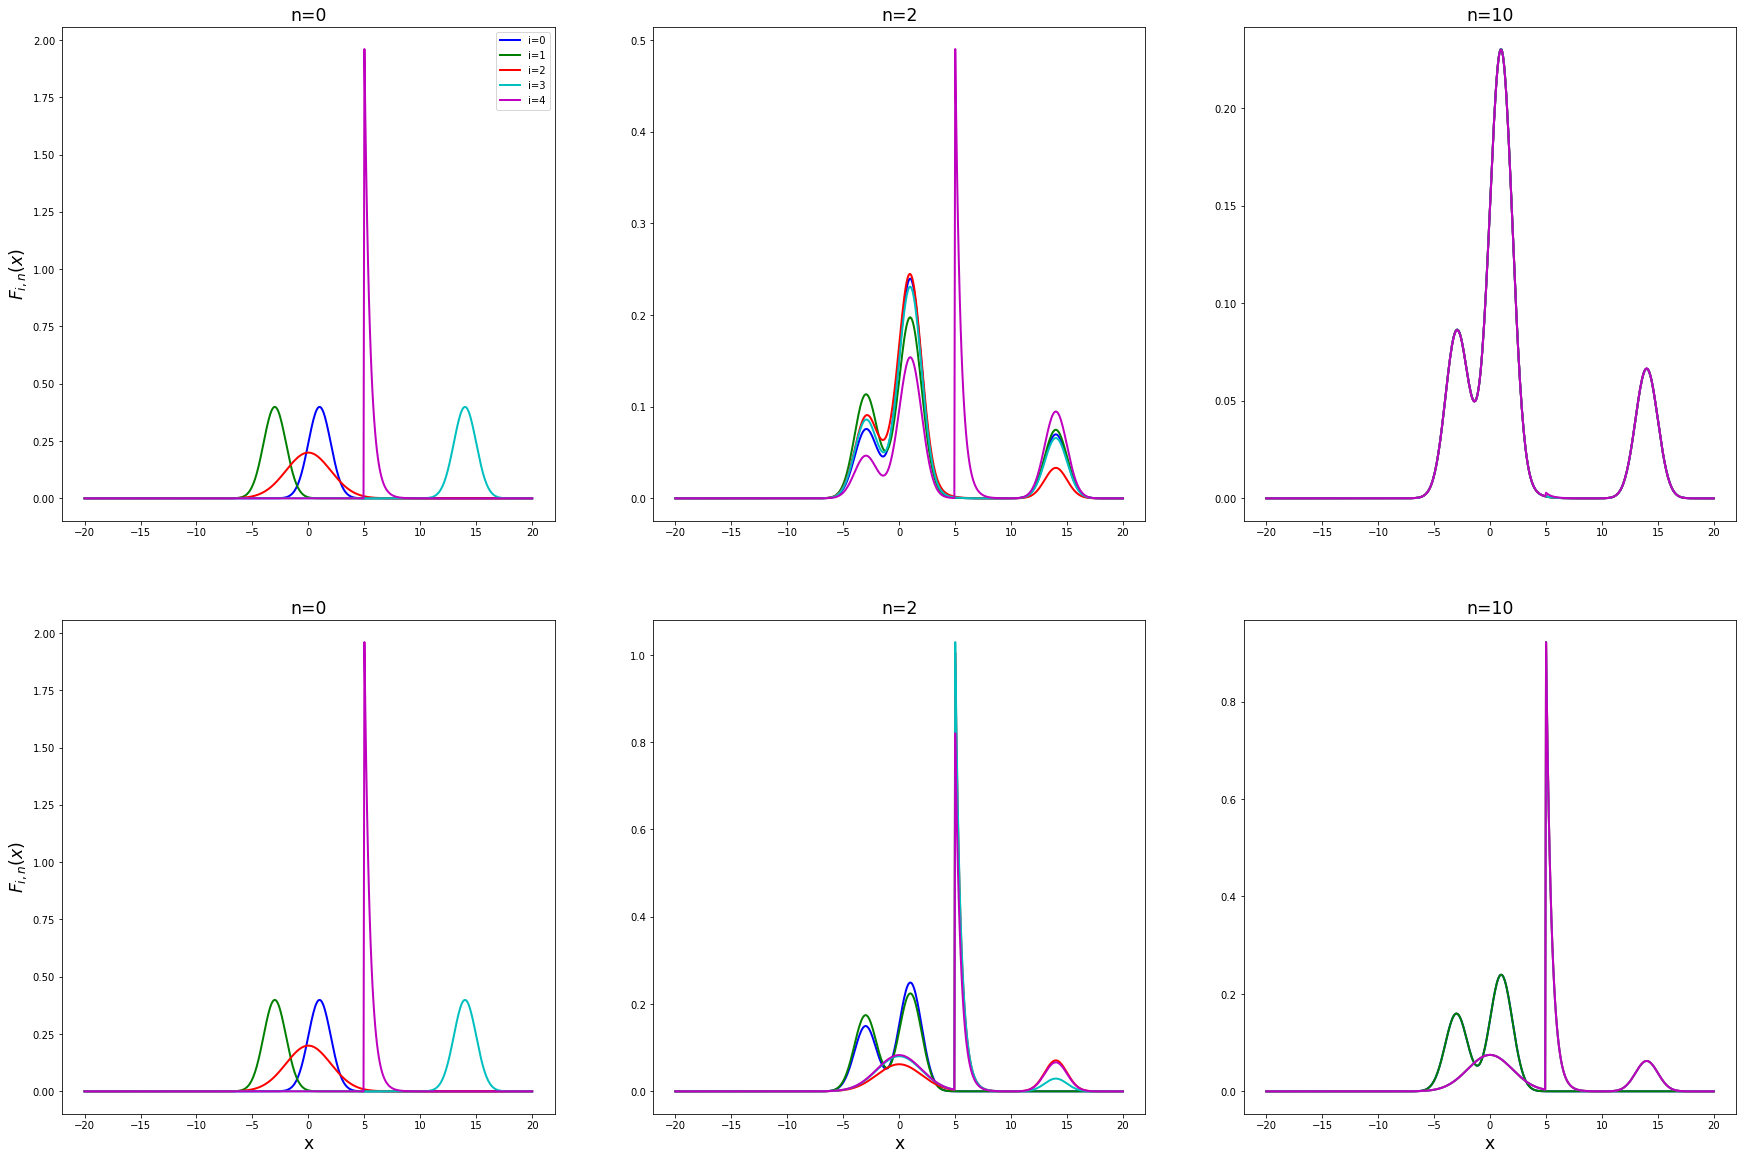

In [18]:
colors=['b','g','r','c','m']
L=np.linspace(-20,20,500)
G1=F
G2=Opinion_Pool_matrix(Puissance_Matrice(M1,2),F)
G3=Opinion_Pool_matrix(Puissance_Matrice(M1,10),F)
H1=F
H2=Opinion_Pool_matrix(Puissance_Matrice(M2,2),F)
H3=Opinion_Pool_matrix(Puissance_Matrice(M2,10),F)

fig, axs = plt.subplots(2,3,figsize=(30,20))
for j in range(k):
    axs[0,0].plot(L,G1[j](L),color=colors[j], linewidth=2,label="i="+str(j))
    axs[0,0].legend()
    axs[0,0].set_title("n=0",size='xx-large')
    axs[0,0].set_ylabel(r"$F_{i,n}(x)$",size='xx-large')
    axs[0,1].plot(L,G2[j](L),color=colors[j], linewidth=2,label=str(j))
    axs[0,1].set_title("n=2",size='xx-large')
    axs[0,2].plot(L,G3[j](L),color=colors[j], linewidth=2,label=str(j))
    axs[0,2].set_title("n=10",size='xx-large')
    axs[1,0].plot(L,H1[j](L),color=colors[j], linewidth=2,label=str(j))
    axs[1,0].set_ylabel(r"$F_{i,n}(x)$",size='xx-large')
    axs[1,0].set_xlabel("x",size='xx-large')
    axs[1,0].set_title("n=0",size='xx-large')
    axs[1,1].plot(L,H2[j](L),color=colors[j], linewidth=2,label=str(j))
    axs[1,1].set_title("n=2",size='xx-large')
    axs[1,1].set_xlabel("x",size='xx-large')                   
    axs[1,2].plot(L,H3[j](L),color=colors[j], linewidth=2,label=str(j))
    axs[1,2].set_xlabel("x",size='xx-large')
    axs[1,2].set_title("n=10",size='xx-large')
    
plt.savefig('Figure0.png', dpi=400)
plt.show()

# Figure 1

In [2]:
N=1000
t=2000
G=nx.complete_graph(N) #le graphe

In [3]:
d1=0.5
d2=0.2
d3=0.1
mu1=0.5
mu2=0.2

M1=de.Simulator(G,d1,mu1,t)
M2=de.Simulator(G,d1,mu2,t)
M3=de.Simulator(G,d2,mu1,t)
M4=de.Simulator(G,d2,mu2,t)
M5=de.Simulator(G,d3,mu1,t)
M6=de.Simulator(G,d3,mu2,t)

100%|██████████| 1999/1999 [00:20<00:00, 97.94it/s] 


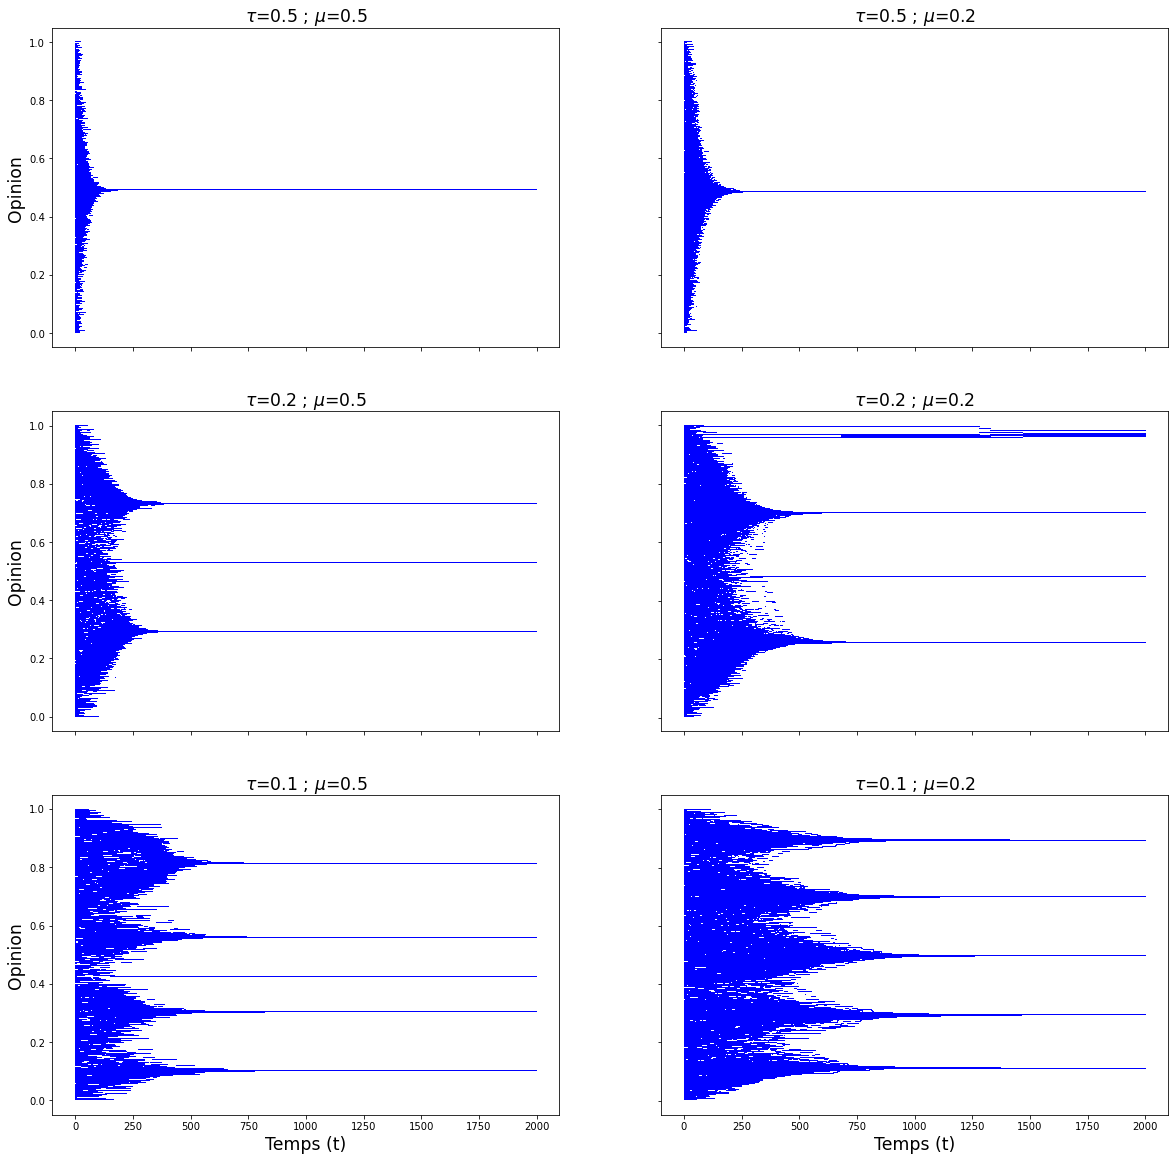

In [4]:
B=np.arange(t)
fig,ax = plt.subplots(3,2,figsize=(20,20))
ax[0,0].plot(B,M1,"b,")
ax[0,0].set_title(r"$\tau$=0.5 ; $\mu$=0.5",size='xx-large')
ax[0,1].plot(B,M2,"b,")
ax[0,1].set_title(r"$\tau$=0.5 ; $\mu$=0.2",size='xx-large')
ax[1,0].plot(B,M3,"b,")
ax[1,0].set_title(r"$\tau$=0.2 ; $\mu$=0.5",size='xx-large')
ax[1,1].plot(B,M4,"b,")
ax[1,1].set_title(r"$\tau$=0.2 ; $\mu$=0.2",size='xx-large')
ax[2,0].plot(B,M5,"b,")
ax[2,0].set_title(r"$\tau$=0.1 ; $\mu$=0.5",size='xx-large')
ax[2,1].plot(B,M6,"b,")
ax[2,1].set_title(r"$\tau$=0.1 ; $\mu$=0.2",size='xx-large')



for a in ax.flat:
    a.set_xlabel("Temps (t)",size='xx-large')
    a.set_ylabel("Opinion",size='xx-large')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig('Figure1.png', dpi=400)
plt.show()

# Figure 2

In [4]:
N=200
t=3000
G=nx.complete_graph(N) #le graphe
mu=0.5

In [5]:
D=np.linspace(0.05,0.5,10)
M=de.Etude_pics_vect_complet(N,D,mu,t,ndigits=1,nb=25)
Moy=de.Moyenne(M)
V=de.Variance(M)

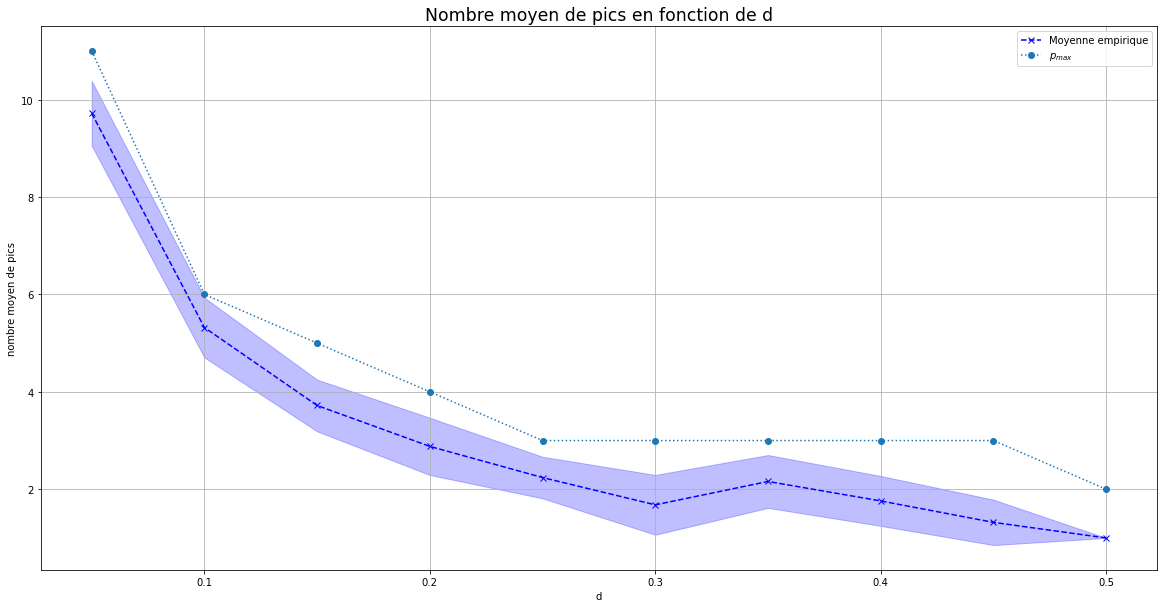

In [17]:
def foo(x):
    a=np.floor(1/(2*x))      
    if (np.abs(a-(1/(2*x)))<=1e-4) :
        return a+1
    else : 
        return a+2
foo=np.vectorize(foo)
V=np.sqrt(de.Variance(M))
plt.figure(figsize=(20, 10))
plt.fill_between(D, Moy-V, Moy+V, alpha=.25, color='b')
plt.plot(D,Moy,marker="x",ls="--",color='b', label= "Moyenne empirique")
plt.plot(D,foo(D),"o:", label= r"$p_{max}$")
plt.title('Nombre moyen de pics en fonction de d',size='xx-large')
plt.xlabel("d")
plt.ylabel("nombre moyen de pics")
plt.legend()
plt.grid()

plt.savefig("Figure2.png", dpi=400)
plt.show()

In [11]:
pk.dump(M,open("/Users/valentinkilian/Documents/Cours/Stage2021/StageValentin/code/Deffuant/complet3.p","wb"))

In [2]:
M=pk.load(open("./Matrice/complet2.p","rb"))

In [10]:
Max=[]
Min=[]
for C in M:
    Max.append(np.max(C))
    Min.append(np.min(C))


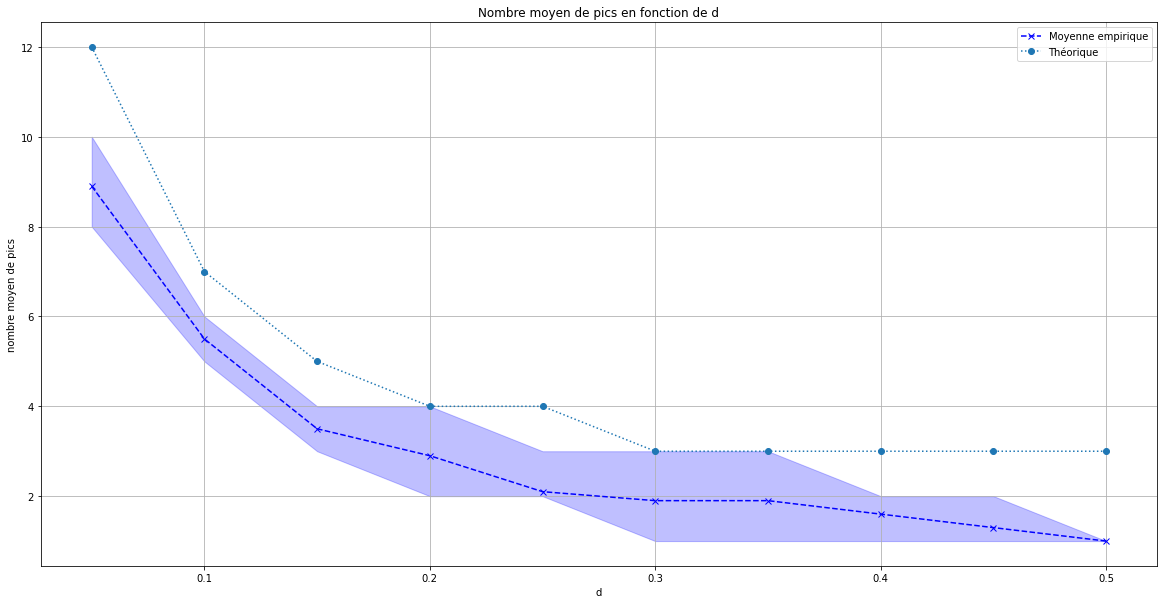

In [12]:
Moy=de.Moyenne(M)
D=np.linspace(0.05,0.5,10)



def foo(x):
    return np.floor(1/(2*x))+2
plt.figure(figsize=(20, 10))
plt.fill_between(D, Min, Max, alpha=.25, color='b')
plt.plot(D,Moy,marker="x",ls="--",color='b', label= "Moyenne empirique")
plt.plot(D,foo(D),"o:", label= "Théorique")
plt.title('Nombre moyen de pics en fonction de d',size='xx-large')
plt.xlabel("d")
plt.ylabel("nombre moyen de pics")
plt.legend()
plt.grid()
plt.show()

# Figure 3

In [5]:
N=200
t=2000
mu=0.5

def fussion(d):
    s=[]
    for i in range(50):
        M=de.Simulator_complet(N,d,mu,t)
        s.append(M[-1])
    s=np.array(s)
    s=s.flatten()
    return s

In [6]:
L0=fussion(0.05)
L1=fussion(0.1)
L2=fussion(0.15)
L3=fussion(0.2)
L4=fussion(0.25)
L5=fussion(0.3)
L6=fussion(0.35)
L7=fussion(0.4)
L8=fussion(0.45)
L9=fussion(0.5)

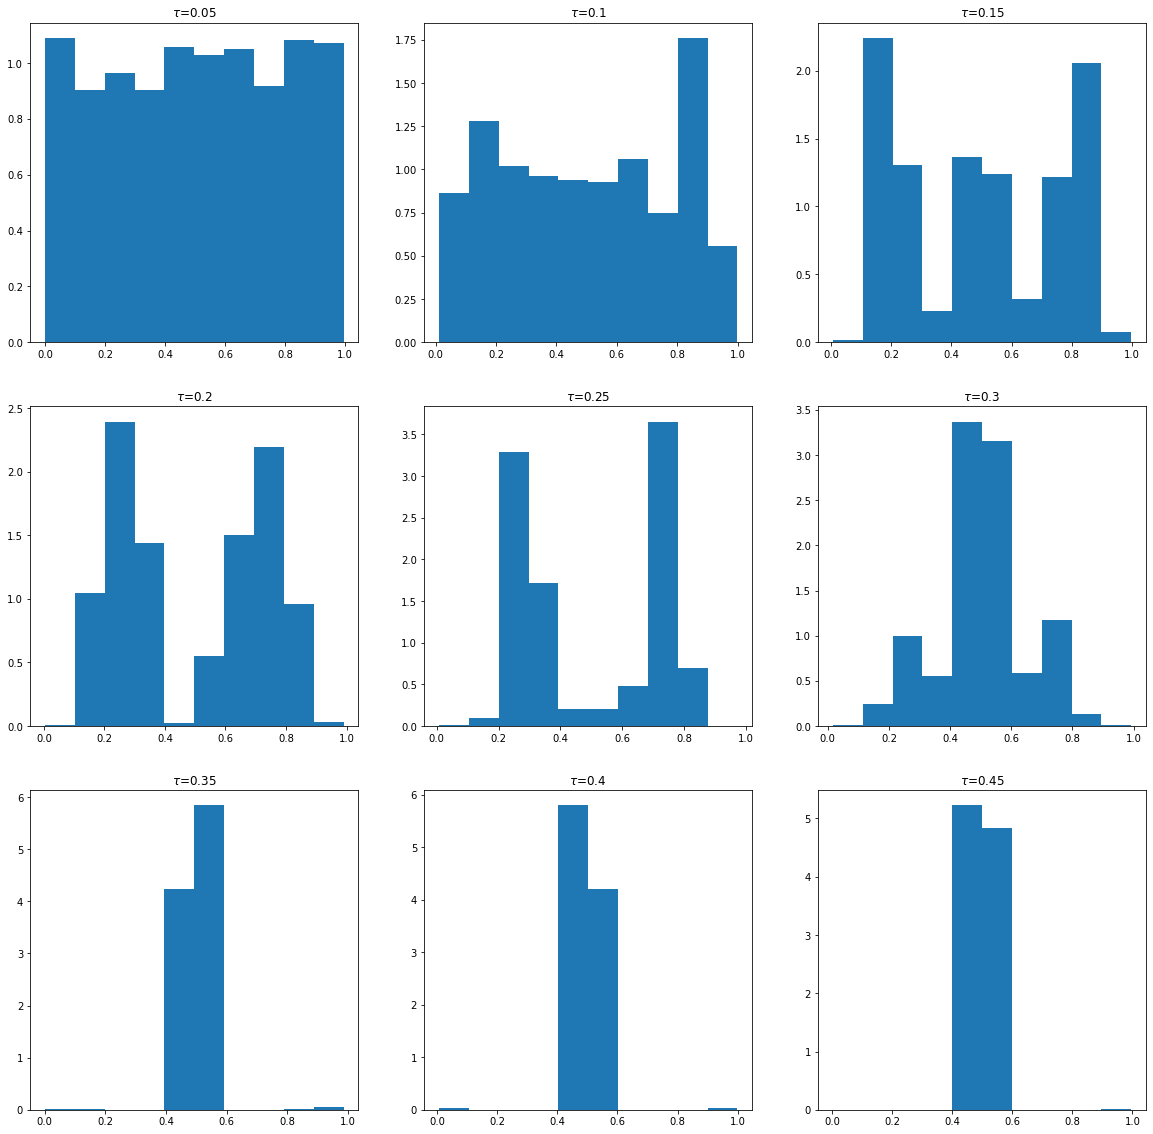

In [48]:
fig,ax = plt.subplots(3,3,figsize=(20,20))
ax[0,0].hist(L0,label="d=0.05",density=True)
ax[0,0].set_title(r"$\tau$=0.05")
ax[0,1].hist(L1,label="d=0.1",density=True)
ax[0,1].set_title(r"$\tau$=0.1")
ax[0,2].hist(L2,label="d=0.15",density=True)
ax[0,2].set_title(r"$\tau$=0.15")
ax[1,0].hist(L3,label="d=0.2",density=True)
ax[1,0].set_title(r"$\tau$=0.2")
ax[1,1].hist(L4,label="d=0.25",density=True)
ax[1,1].set_title(r"$\tau$=0.25")
ax[1,2].hist(L5,label="d=0.3",density=True)
ax[1,2].set_title(r"$\tau$=0.3")
ax[2,0].hist(L6,label="d=0.35",density=True)
ax[2,0].set_title(r"$\tau$=0.35")
ax[2,1].hist(L7,label="d=0.4",density=True)
ax[2,1].set_title(r"$\tau$=0.4")
ax[2,2].hist(L8,label="d=0.45",density=True)
ax[2,2].set_title(r"$\tau$=0.45")

plt.savefig('Figure3.png', dpi=400)
plt.show()

# Figure 4

In [67]:
N=1000
d=0.1
mu1=0.5
mu2=0.05
t=5000
M1=de.Simulator_complet(N,d,mu1,t)
M2=de.Simulator_complet(N,d,mu2,t)

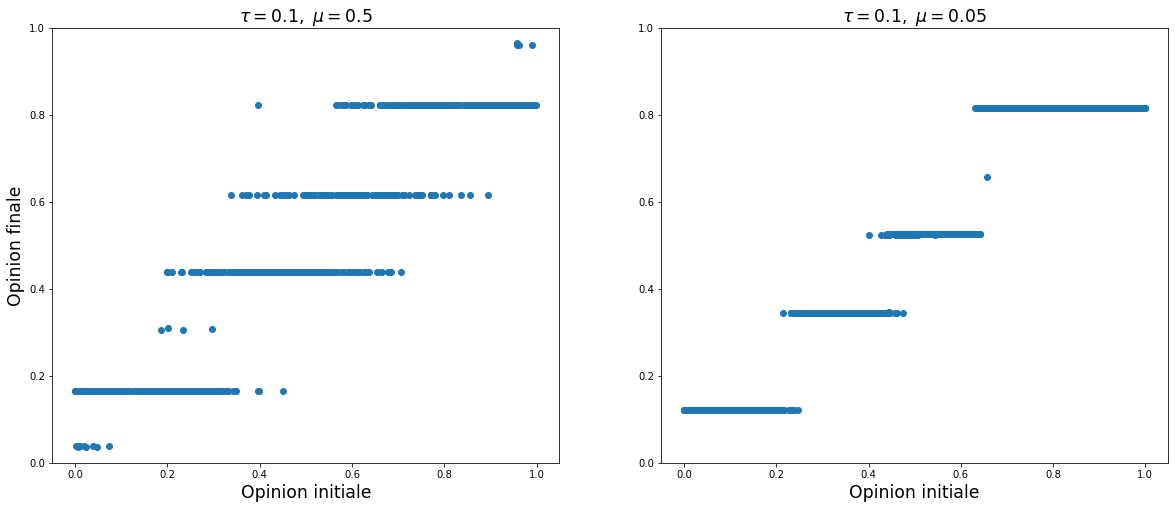

In [68]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].scatter(M1[0],M1[-1])
ax[0].set_ylim(0,1)
ax[0].set_ylabel("Opinion finale",size='xx-large')
ax[0].set_xlabel("Opinion initiale",size='xx-large')
ax[0].set_title(r"$\tau=0.1,~\mu=0.5$",size='xx-large')
ax[1].scatter(M2[0],M2[-1])
ax[1].set_ylim(0,1)
ax[1].set_xlabel("Opinion initiale",size='xx-large')
ax[1].set_title(r"$\tau=0.1,~\mu=0.05$",size='xx-large')

plt.savefig('Figure4.png', dpi=400)
plt.show()

# Figure 5

In [11]:
l=18 #taille du graph
t=3000
G=nx.grid_graph([l,l]) #le graphe
M=nx.adjacency_matrix(G)
G=nx.to_networkx_graph(M)
mu=0.5 #capacité d'adaptation
d=0.3

In [6]:
d1=0.5
d2=0.3
d3=0.2
mu1=0.5
mu2=0.2

M1=de.Simulator(G,d1,mu1,t)
M2=de.Simulator(G,d1,mu2,t)
M3=de.Simulator(G,d2,mu1,t)
M4=de.Simulator(G,d2,mu2,t)
M5=de.Simulator(G,d3,mu1,t)
M6=de.Simulator(G,d3,mu2,t)

100%|██████████| 2999/2999 [00:04<00:00, 735.08it/s]


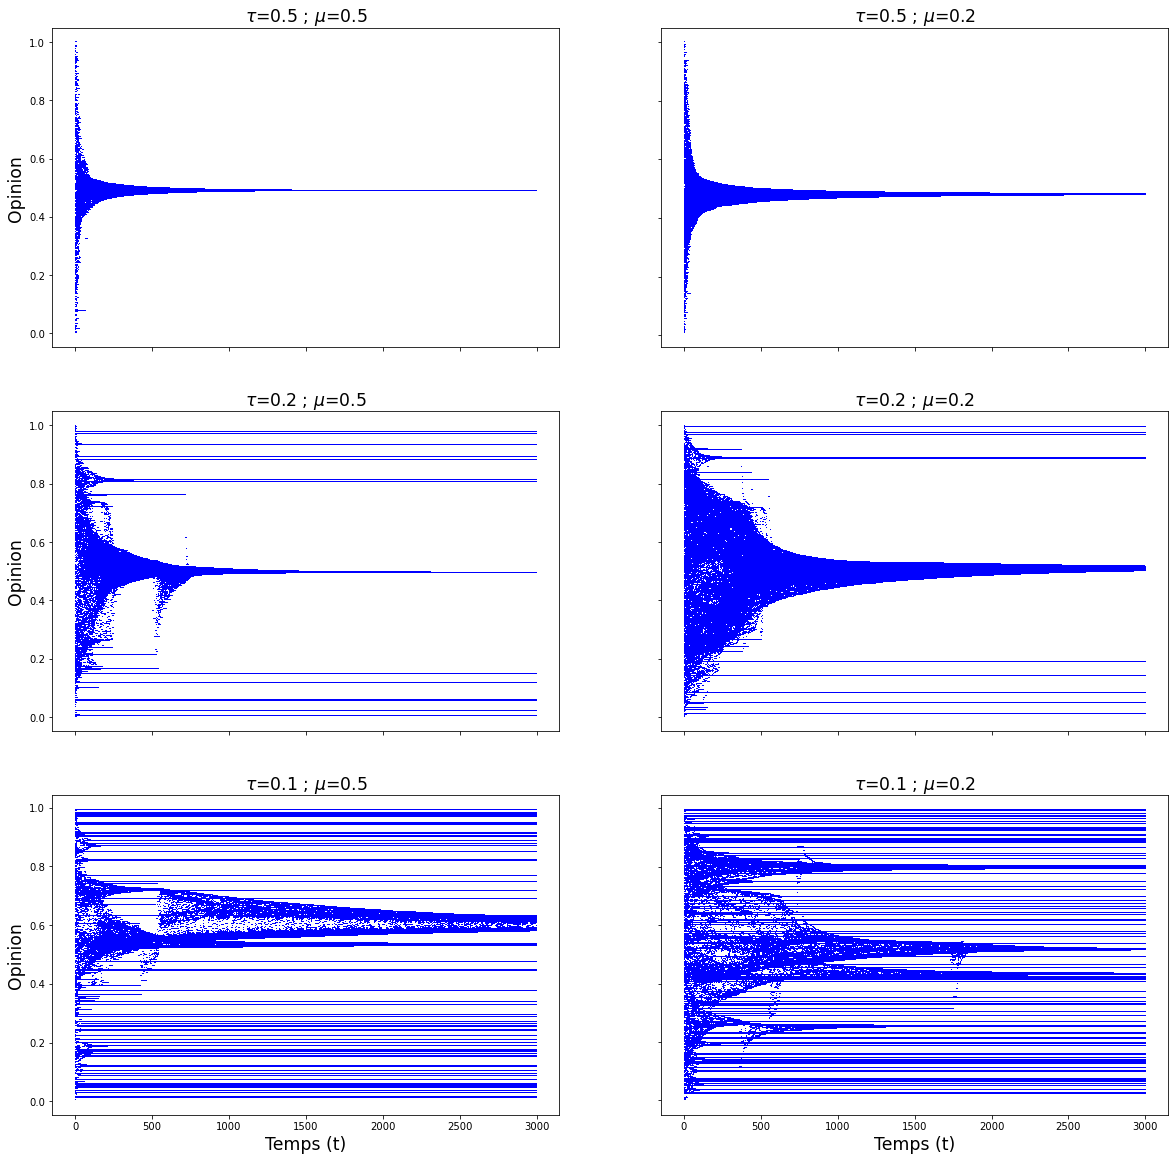

In [7]:
B=np.arange(t)
fig,ax = plt.subplots(3,2,figsize=(20,20))
ax[0,0].plot(B,M1,"b,")
ax[0,0].set_title(r"$\tau$=0.5 ; $\mu$=0.5",size='xx-large')
ax[0,1].plot(B,M2,"b,")
ax[0,1].set_title(r"$\tau$=0.5 ; $\mu$=0.2",size='xx-large')
ax[1,0].plot(B,M3,"b,")
ax[1,0].set_title(r"$\tau$=0.2 ; $\mu$=0.5",size='xx-large')
ax[1,1].plot(B,M4,"b,")
ax[1,1].set_title(r"$\tau$=0.2 ; $\mu$=0.2",size='xx-large')
ax[2,0].plot(B,M5,"b,")
ax[2,0].set_title(r"$\tau$=0.1 ; $\mu$=0.5",size='xx-large')
ax[2,1].plot(B,M6,"b,")
ax[2,1].set_title(r"$\tau$=0.1 ; $\mu$=0.2",size='xx-large')



for a in ax.flat:
    a.set_xlabel("Temps (t)",size='xx-large')
    a.set_ylabel("Opinion",size='xx-large')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig('Figure5.png', dpi=400)
plt.show()

# Figure 6

In [31]:
l=18
d1=0.2
d2=0.35
mu=0.5
t=5000
M1=de.Simulator_grille(l,d1,mu,t)
M2=de.Simulator_grille(l,d2,mu,t)

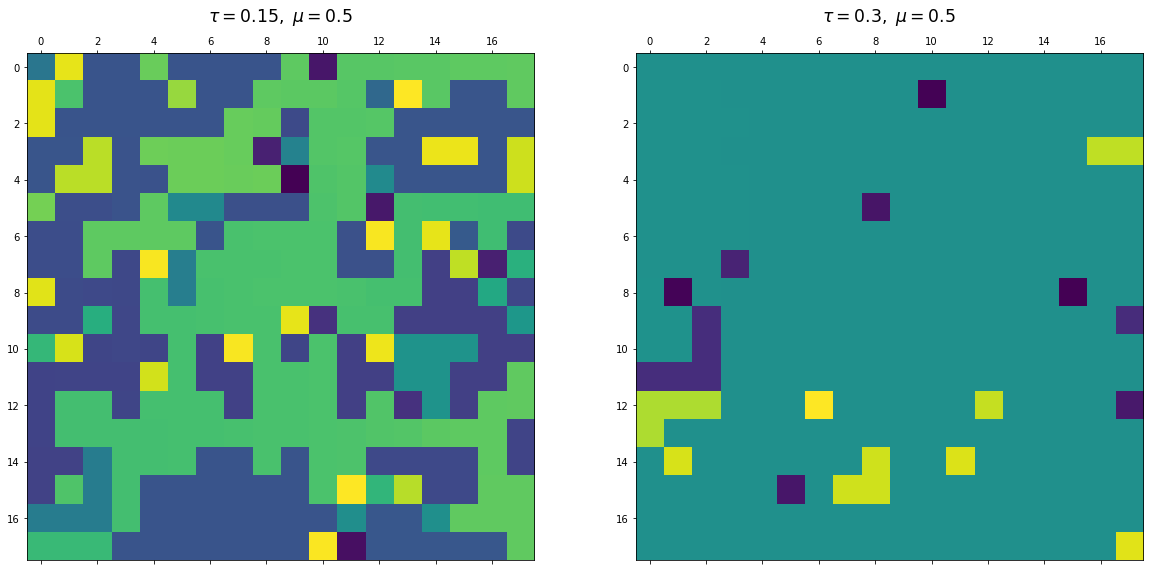

In [32]:
fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].matshow(M1[-1])
ax[0].set_title(r"$\tau=0.15,~\mu=0.5$",size='xx-large')
ax[1].matshow(M2[-1])
ax[1].set_title(r"$\tau=0.3,~\mu=0.5$",size='xx-large')

plt.savefig('Figure6.png', dpi=400)
plt.show()

# Figure 6.5

In [31]:
l=18
d=0.24
mu=0.5
t=30000
M=de.Simulator_grille(l,d,mu,t)

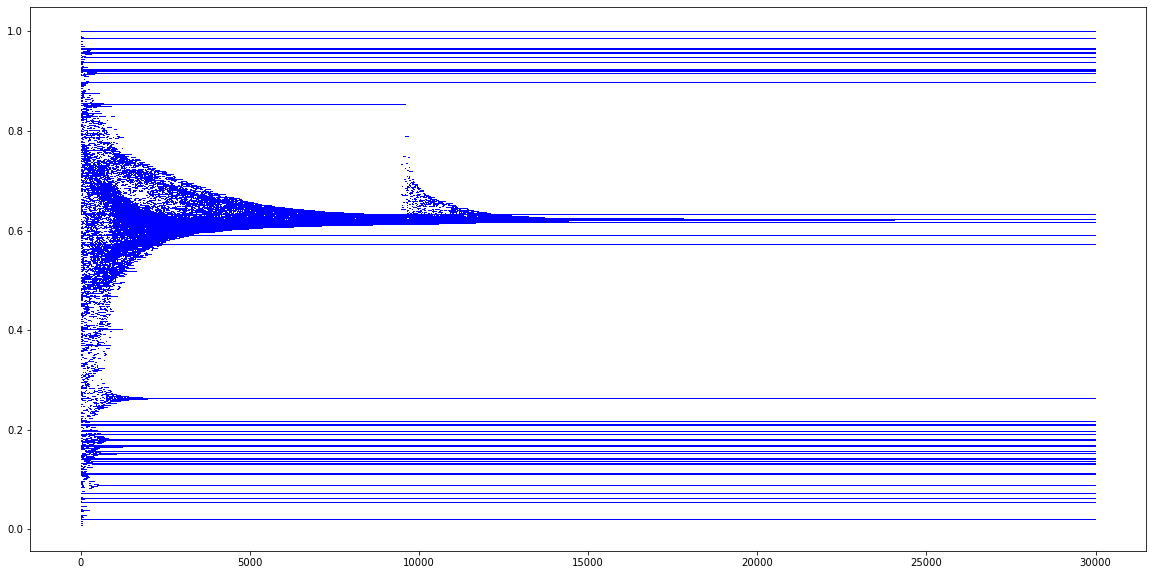

In [32]:
rM=np.reshape(M,newshape=(t,l*l))
B=np.arange(t)
fig=plt.figure(figsize=(20, 10))
plt.plot(B,rM,"b,")
plt.show()

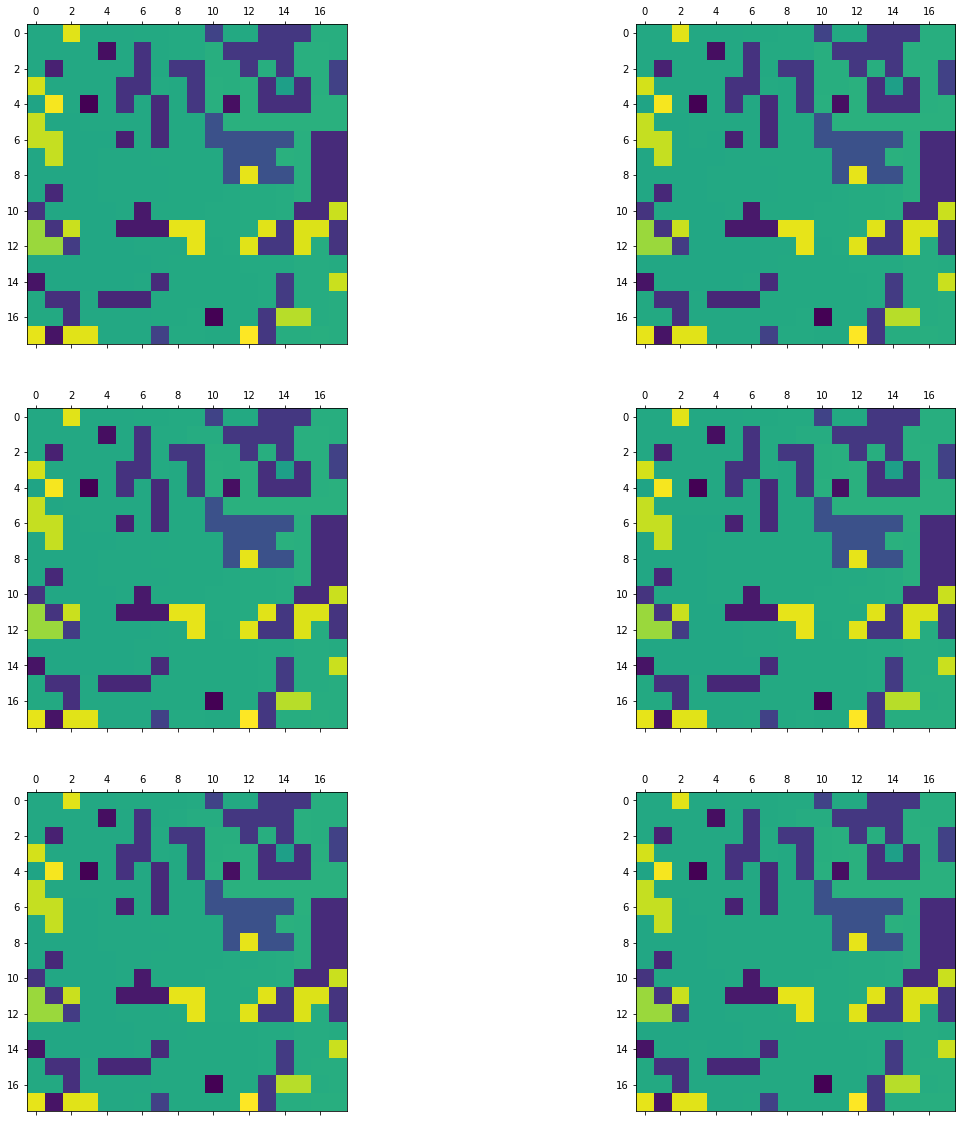

In [33]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
ax[0,0].matshow(M[6180])
ax[0,1].matshow(M[6190])
ax[1,0].matshow(M[6200])
ax[1,1].matshow(M[6210])
ax[2,0].matshow(M[6220])
ax[2,1].matshow(M[6230])
plt.show()



# Figure 7

In [37]:
l=18
d=0.3
mu=0.5
t=20000
M=de.Simulator_grille(l,d,mu,t)

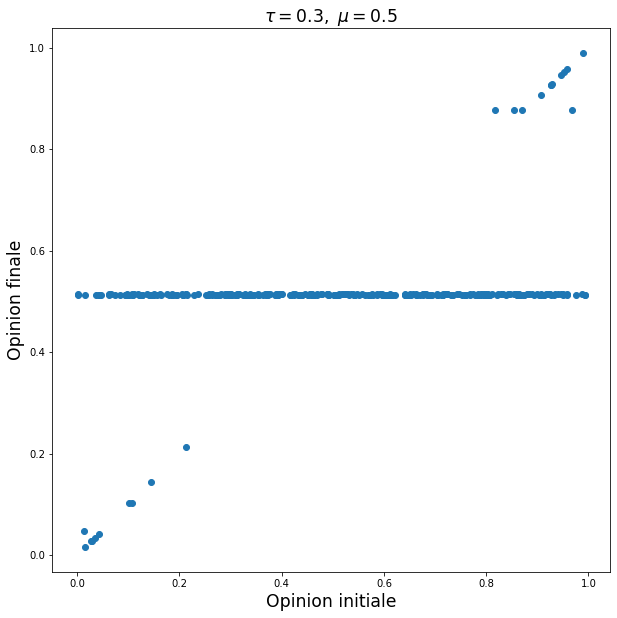

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(M[0],M[-1])
plt.ylabel("Opinion finale",size='xx-large')
plt.xlabel("Opinion initiale",size='xx-large')
plt.title(r"$\tau=0.3,~\mu=0.5$",size='xx-large')

plt.savefig('Figure7.png', dpi=400)
plt.show()

# Figure 8

In [4]:
N=500  #Nombre d'individu
M=8
t=5000
G=nx.barabasi_albert_graph(N,M) 

In [5]:
d1=0.5
d2=0.2
d3=0.1
mu1=0.5
mu2=0.2

M1=de.Simulator(G,d1,mu1,t)
M2=de.Simulator(G,d1,mu2,t)
M3=de.Simulator(G,d2,mu1,t)
M4=de.Simulator(G,d2,mu2,t)
M5=de.Simulator(G,d3,mu1,t)
M6=de.Simulator(G,d3,mu2,t)

100%|██████████| 4999/4999 [00:10<00:00, 494.67it/s]


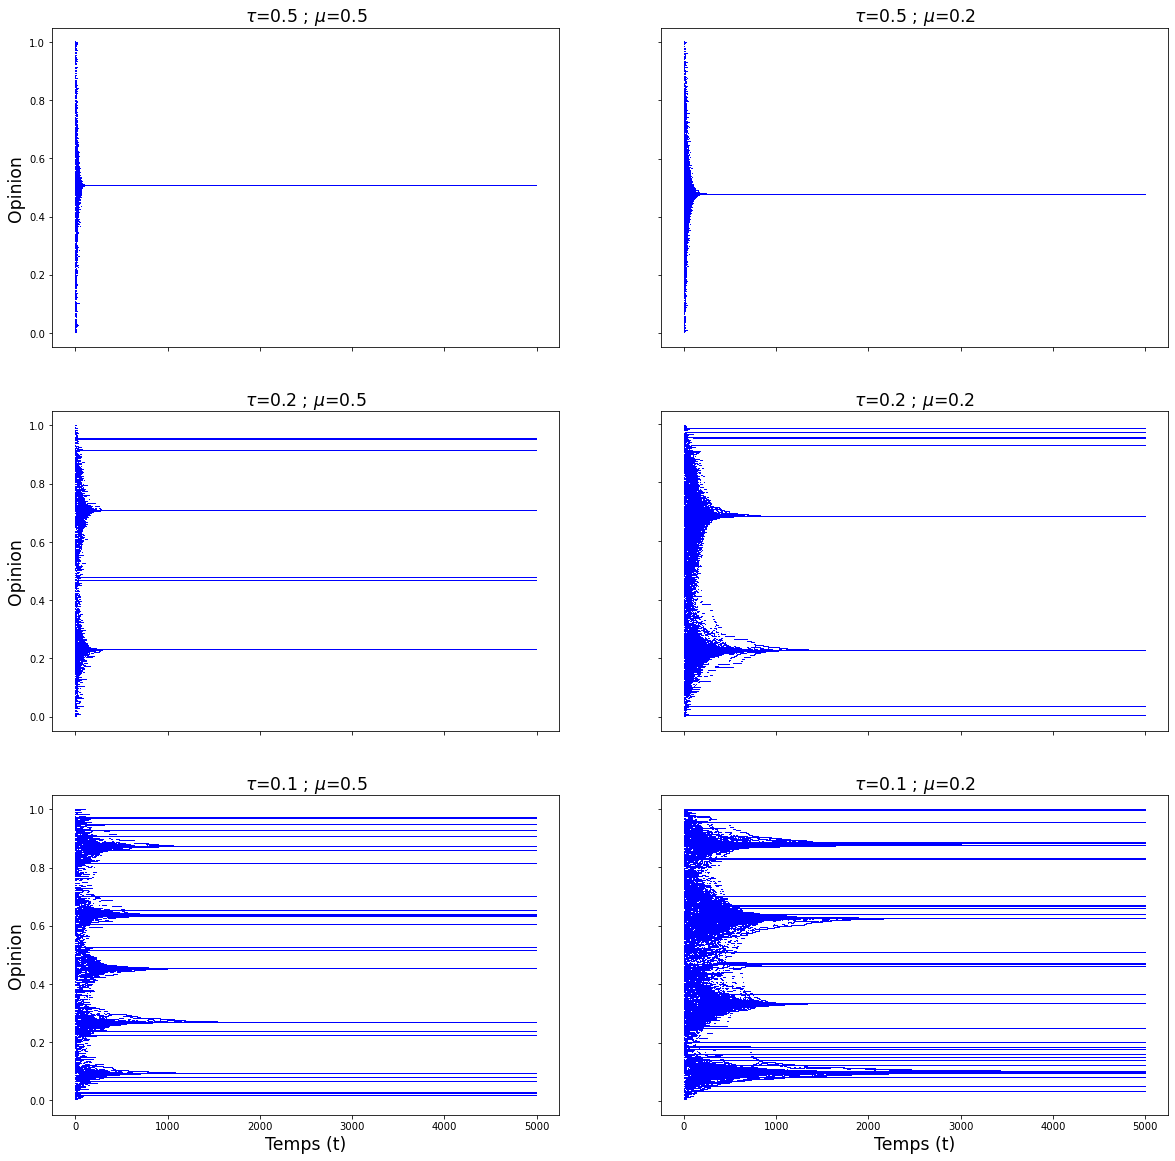

In [6]:
B=np.arange(t)
fig,ax = plt.subplots(3,2,figsize=(20,20))
ax[0,0].plot(B,M1,"b,")
ax[0,0].set_title(r"$\tau$=0.5 ; $\mu$=0.5",size='xx-large')
ax[0,1].plot(B,M2,"b,")
ax[0,1].set_title(r"$\tau$=0.5 ; $\mu$=0.2",size='xx-large')
ax[1,0].plot(B,M3,"b,")
ax[1,0].set_title(r"$\tau$=0.2 ; $\mu$=0.5",size='xx-large')
ax[1,1].plot(B,M4,"b,")
ax[1,1].set_title(r"$\tau$=0.2 ; $\mu$=0.2",size='xx-large')
ax[2,0].plot(B,M5,"b,")
ax[2,0].set_title(r"$\tau$=0.1 ; $\mu$=0.5",size='xx-large')
ax[2,1].plot(B,M6,"b,")
ax[2,1].set_title(r"$\tau$=0.1 ; $\mu$=0.2",size='xx-large')



for a in ax.flat:
    a.set_xlabel("Temps (t)",size='xx-large')
    a.set_ylabel("Opinion",size='xx-large')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig('Figure8.png', dpi=400)
plt.show()

# Figure 9 

In [27]:
N=2000  #Nombre d'individu
M=8
t=5000
G=nx.barabasi_albert_graph(N,M) 

In [28]:
d=0.3
mu=0.1
M=de.Simulator(G,d,mu,t)

100%|██████████| 4999/4999 [00:06<00:00, 739.97it/s]


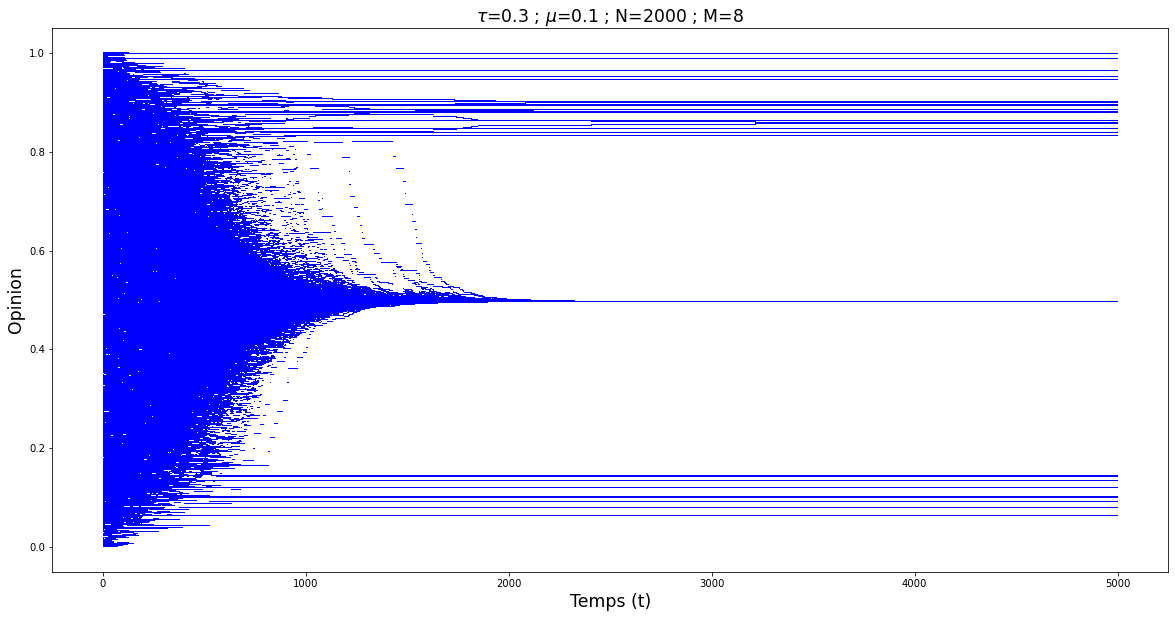

In [30]:
B=np.arange(t)
fig=plt.figure(figsize=(20, 10))
plt.plot(B,M,"b,")
plt.title(r"$\tau$=0.3 ; $\mu$=0.1 ; N=2000 ; M=8 ",size='xx-large')
plt.xlabel("Temps (t)",size='xx-large')
plt.ylabel("Opinion",size='xx-large')

plt.savefig('Figure9.png', dpi=400)
plt.show()


# Figure 10

In [48]:
N=2000  #Nombre d'individu
M=8
t=10000
G=nx.barabasi_albert_graph(N,M) 

In [53]:
d=0.2
mu1=0.05
mu2=0.5
M1=de.Simulator(G,d,mu1,t)
M2=de.Simulator(G,d,mu2,t)

100%|██████████| 9999/9999 [00:12<00:00, 784.69it/s]


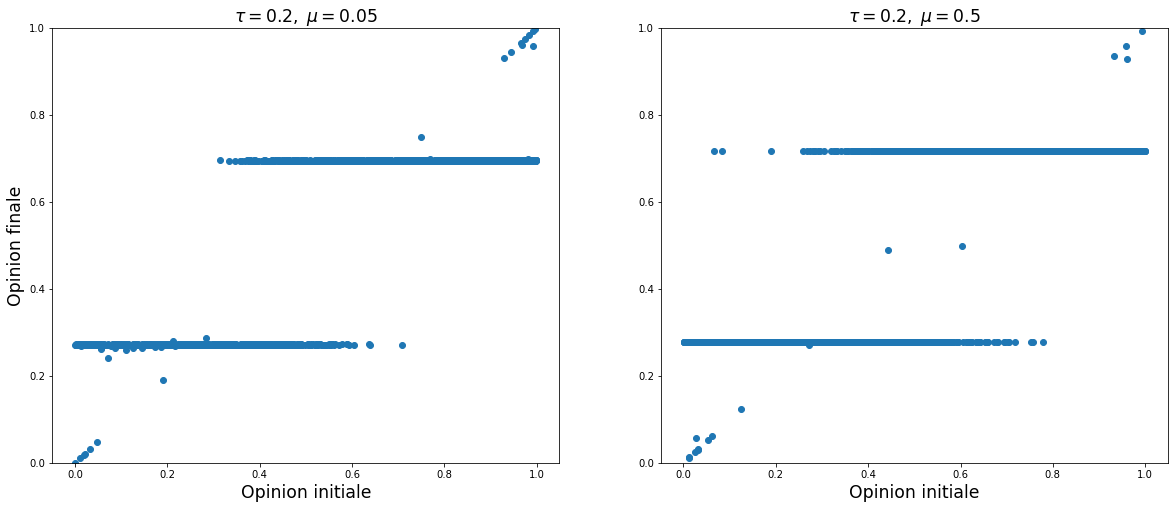

In [55]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].scatter(M1[0],M1[-1])
ax[0].set_ylim(0,1)
ax[0].set_ylabel("Opinion finale",size='xx-large')
ax[0].set_xlabel("Opinion initiale",size='xx-large')
ax[0].set_title(r"$\tau=0.2,~\mu=0.05$",size='xx-large')
ax[1].scatter(M2[0],M2[-1])
ax[1].set_ylim(0,1)
ax[1].set_xlabel("Opinion initiale",size='xx-large')
ax[1].set_title(r"$\tau=0.2,~\mu=0.5$",size='xx-large')

plt.savefig('Figure10.png', dpi=400)
plt.show()

# Figure 11

In [3]:
N=2000  #Nombre d'individu
M=8
t=10000
G=nx.barabasi_albert_graph(N,M) 

In [4]:
B=[]
for i in range(N):
   B.append(len(list(G.neighbors(i)))) 

In [5]:
d1=0.4
d2=0.2
mu=0.5
M1=de.Simulator(G,d1,mu,t)
M2=de.Simulator(G,d2,mu,t)

100%|██████████| 9999/9999 [00:12<00:00, 778.69it/s]


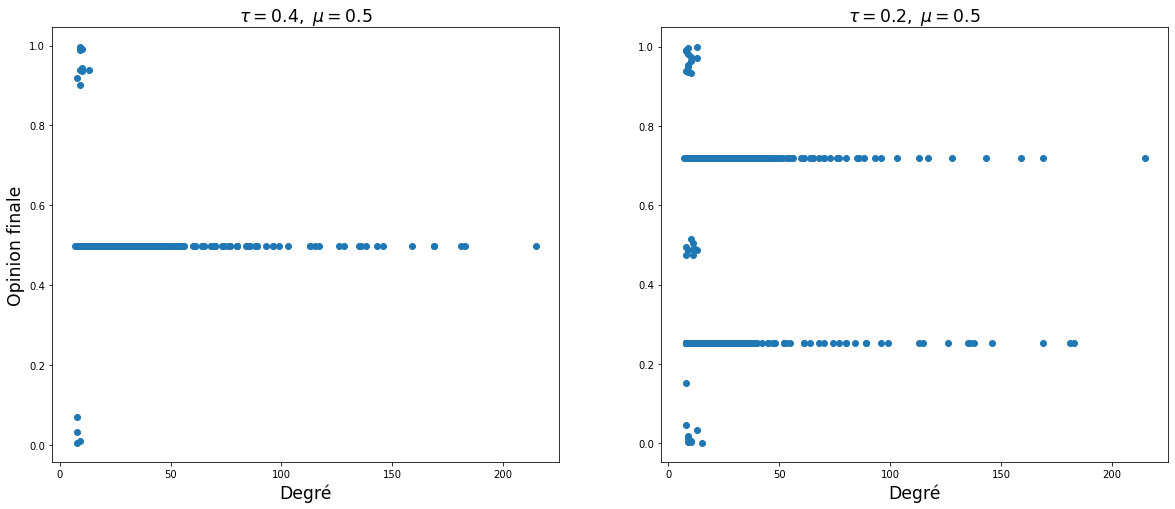

In [75]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].scatter(B,M1[-1])
ax[0].set_ylabel("Opinion finale",size='xx-large')
ax[0].set_xlabel("Degré",size='xx-large')
ax[0].set_title(r"$\tau=0.4,~\mu=0.5$",size='xx-large')
ax[1].scatter(B,M2[-1])
ax[1].set_xlabel("Degré",size='xx-large')
ax[1].set_title(r"$\tau=0.2,~\mu=0.5$",size='xx-large')

plt.savefig('Figure11.png', dpi=400)
plt.show()

# Figure 12

In [6]:
q=np.quantile(B,0.25)

In [7]:
M1_bis=[]
M1_prime=[]
M2_bis=[]
M2_prime=[]
for i in range(N):
    if B[i]<=q:
        M1_prime.append(M1[i])
        M2_prime.append(M2[i])
    else:
        M1_bis.append(M1[i])
        M2_bis.append(M2[i])

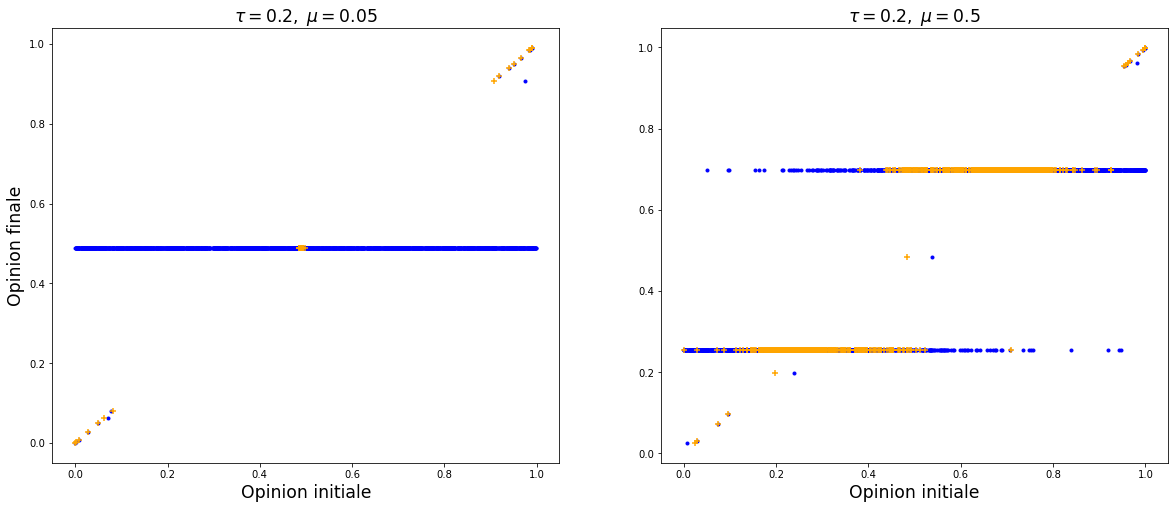

In [10]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].scatter(M1_bis[0],M1_bis[-1],color='b',marker='.')
ax[0].scatter(M1_prime[0],M1_prime[-1],color='orange',marker='+')
ax[0].set_ylabel("Opinion finale",size='xx-large')
ax[0].set_xlabel("Opinion initiale",size='xx-large')
ax[0].set_title(r"$\tau=0.2,~\mu=0.05$",size='xx-large')
ax[1].scatter(M2_bis[0],M2_bis[-1],color='b',marker='.')
ax[1].scatter(M2_prime[0],M2_prime[-1],color='orange',marker='+')
ax[1].set_xlabel("Opinion initiale",size='xx-large')
ax[1].set_title(r"$\tau=0.2,~\mu=0.5$",size='xx-large')

plt.savefig('Figure12.png', dpi=400)
plt.show()